## 분류평가
- TP, FP, FN, TN는 예측 클래스와 실제 클래스의 Positive 결정 값과 Negative 결정 값의 결합에 따라 결정
- 앞문자 TruelFalse는 예측값과 실제 값이 같은가 틀린가를 의미하고 뒤 문자 Negative/Positive는 예측 결과 값이 부정 긍정을 의미
- TN는 예측값을 Negative 값 0으로 예측했고 실제값 역시 Negative 값 이
- FP는 예측값을 Positive 값 1로 예측했고 실제 값은 Negative 값 이
- FN은 예측값을 Negative 값 0으로 예측했고 실제 값은 Positive 값 1
- TP는 예측값을 Positive 값 1로 예측했고 실제값 역시 Positive 값 1
- 정확도 = (TP + TN) / ( TP + TN + FP + FN)
- 정밀도 = TP / ( TP + FP)
- 재현율 = TPI (TP + FN)  *정밀도가 높으면 재현율이 낮아지는데 한쪽으로 치우쳐지지 않게 해야함
- F1 = 2 * ( 정밀도 * 재현을) / (정밀도 + 재현율) : 정밀도와 재현율이 어느 한쪽으로 치우치지 않는 수치를 나타낼때 높아짐. threshold를 조정해서 비율조정
- 정밀도와 재현율은 Positive 데이터 세트의 예측 성능에 좀 더 초점을 맞춘 평가 지표
- 재현율이 중요 지표인 경우는 실제 Positive 양성 데이터를 Negative로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우(ex. 보험사기, 암진단)

## 정밀도 / 재현을 트레이드 오프
- 정밀도 또는 재현율이 특별히 강조돼야 할 경우 분류의 결정 임곗값(Threshold)을 조정해 정밀도 또는 재현율의 수치를 높일 수 있음
- 정밀도와 재현율은 한쪽을 높이면 다른 하나의 수치는 낮아지므로 트레이드오프(Trade-off)관계임

## 예측 확률을 반환하는 predict_proba()
- 사이킷런 분류 알고리즘은 예측 데이터가 특정 레이블(결정 클래스 값)에 속하는지를 계산하기 위해 먼저 개별 레이블별로 결정 확률을 구함
- 그리고 예측 확률이 큰 레이블 값으로 예측
- 이진 분류 모델에서 특정 데이터가 0이 될 확률이 10%, 1이 될 확률이 90%로 예측되었다면 최종 예측은 더 큰 확률을 가진 1로 예측
- 이진 분류에서는 이 임곗값을 0.5로 정하고 이 기준 값보다 확률이 크면 positive, 작으면 negative로 결정함
- 사이킷런은 객별 데이터별로 예측 확률을 반환하는 메서드인 predict_prob()를 제공 - 학습이 완료된 사이킷런 Classifier 객체에서 호출
- predict() 메서드와 유사하지만 단지 반환 결과가 예측 결과 클래스값이 아닌 예측 확률 결과임.

In [9]:
import pandas as pd
titanic_df = pd.read_csv('/Users/joy/Documents/GitHub/0Oong/수업내용/dataset/train.csv')
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [10]:
# 일괄 전처리 사용자 함수(null 처리, 불필요 칼럼 삭제, 레이블 인코딩) 
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
# Age(평균), Cabin('N'), Embarked('N'), Fare(0)
def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 속성 제거
# PassengerId, Name, Ticket(티켓번호)
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
    return df

# 레이블 인코딩 수행.
# Cabin(선실번호 첫문자만 추출 후 인코딩), Sex(성별), Embarked(중간 정착 항구)
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 Data Preprocessing 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [11]:
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression()
from sklearn.metrics import accuracy_score

In [12]:
# 과제 
# 6개 알고리즘 적용, 학습/예측/평가를 수행
# KNN, 서포트백터머신, 렌덤포레스트, decision tree, GBM, logistic Regression

# 6개 알고리즘에 대한 요약


In [13]:
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
y_titanic_df = titanic_df['Survived']
X_titainc_df = titanic_df.drop('Survived', axis=1)
X_titainc_df = transform_features(X_titainc_df)

X_train, X_test, y_train, y_test = train_test_split(X_titainc_df, y_titanic_df,
test_size = 0.2, random_state=11)

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred=lr_clf.predict(X_test)
accuracy_lr = accuracy_score(y_test, pred)
accuracy_lr

0.8491620111731844

In [14]:
pred_proba = lr_clf.predict_proba(X_test) 
pred = lr_clf.predict(X_test)
print(type(pred_proba[:3]))
print(pred.reshape(-1,1)[:3]) # 얘랑 마지막줄애랑 비교해서 보기 pred랑 pred_proba
print()
print(pred_proba[:3])

# 모든 행별로 1이 될지 0이될지를 나타내주는 거라고 생각하면 된다. 

<class 'numpy.ndarray'>
[[1]
 [0]
 [0]]

[[0.46200919 0.53799081]
 [0.87869718 0.12130282]
 [0.8771684  0.1228316 ]]


정리하자면 pred, pred_proba는 0이냐 1이냐를 구분해주는걸 보여주기 때문에 독립변수랑 종속변수(타이타닉에선 survived)를 분리해야만 사용할 수 있다.

In [15]:
from sklearn.preprocessing import Binarizer

X = [[1,-1,2],
    [2,0,0],
    [0,1.1,1.2]]

binarizer =  Binarizer(threshold=1.1)  #binarizer는 threshold를 지정해서 기준값 보다 같거나 작으면 0, 크면 1을 반환한다. 
# (원래 pred_proba의 기본은 0.5를 기준으로 값 반환)

print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [16]:
custom_threshold = 0.5
print('pred_proba : \n', pred_proba[:5])
print()
# 생존 확률 추출 후 2차원 배열로 변환
# pred_proba = lr_clf.predict_proba(X_test) 
pred_proba_1 = pred_proba[:,1].reshape(-1,1)
print('생존확률 : \n', pred_proba_1[:5])
print()
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)
custom_predict[:5]

pred_proba : 
 [[0.46200919 0.53799081]
 [0.87869718 0.12130282]
 [0.8771684  0.1228316 ]
 [0.88258534 0.11741466]
 [0.85519904 0.14480096]]

생존확률 : 
 [[0.53799081]
 [0.12130282]
 [0.1228316 ]
 [0.11741466]
 [0.14480096]]



array([[1.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [17]:
# get_clf_eval 평가 사용자 정의 함수
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred) 
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    print('오차행렬')
    print(confusion)
    print('정확도 : {:.4f}, 정밀도 : {:.4f}, 재현율 : {:.4f}, f1:{:.4f}'. format(accuracy, precision, recall, f1))
get_clf_eval(y_test, custom_predict)

오차행렬
[[104  14]
 [ 13  48]]
정확도 : 0.8492, 정밀도 : 0.7742, 재현율 : 0.7869, f1:0.7805


In [18]:
# 정확도 = (TP + TN) / ( TP + TN + FP + FN)
# 정밀도 = TP / ( TP + FP)
# 재현율 = TP / (TP + FN)
# F1 = 2 * ( 정밀도 * 재현을) / (정밀도 + 재현율)

a = 48 / (48 + 14)
b = 48 / (48 + 13)
print('정확도 :', (48 + 104) / (104 + 14 + 13 + 48))
print('정밀도 :', 48 / (48 + 14))
print('재현율 :', 48 / (48 + 13))
print('F1 : ', ((a * b) / (a+b))*2)

# TN FP
# FN TP 155페이지 참고

정확도 : 0.8491620111731844
정밀도 : 0.7741935483870968
재현율 : 0.7868852459016393
F1 :  0.7804878048780488


In [19]:
import numpy as np
Label = np.unique([y_test, pred])
confustion_matrix = pd.DataFrame(
    confusion_matrix(y_test, pred, labels=Label), 
    index=['true:{:}'.format(x) for x in Label], 
    columns=['pred:{:}'.format(x) for x in Label])
print(confustion_matrix)

        pred:0  pred:1
true:0     104      14
true:1      13      48


In [20]:
Label = np.unique([y_test, pred])
Label

array([0, 1])

In [21]:
thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
# 객체 내의 값을 차례로 iteration 하면서 evaluation 수행

    for custom_threshold in thresholds : 
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임계값', custom_threshold)
        get_clf_eval(y_test,custom_predict)
        print()

get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

임계값 0.4
오차행렬
[[98 20]
 [10 51]]
정확도 : 0.8324, 정밀도 : 0.7183, 재현율 : 0.8361, f1:0.7727

임계값 0.45
오차행렬
[[103  15]
 [ 12  49]]
정확도 : 0.8492, 정밀도 : 0.7656, 재현율 : 0.8033, f1:0.7840

임계값 0.5
오차행렬
[[104  14]
 [ 13  48]]
정확도 : 0.8492, 정밀도 : 0.7742, 재현율 : 0.7869, f1:0.7805

임계값 0.55
오차행렬
[[109   9]
 [ 15  46]]
정확도 : 0.8659, 정밀도 : 0.8364, 재현율 : 0.7541, f1:0.7931

임계값 0.6
오차행렬
[[112   6]
 [ 16  45]]
정확도 : 0.8771, 정밀도 : 0.8824, 재현율 : 0.7377, f1:0.8036



## 결과해석
- 임계값이 낮을수록 많은 수의 양성 예측으로 인해 재현율 값이 극도로 높아지고 정밀도 값이 낲아짐.(FN이 작아지고 FP가 커짐)
- 로지스틱 회귀 기반의 타이타닉 생존자 예측 모델의 경우 임계값이 약 0.5 지점에서 재현율과 정밀도가 비슷해지는 모습을 보인다.
- 단순희 하나의 성능 지표 수치를 높이기 위한 수단으로 사용하는 것은 지양하고 업무 환경에 맞게 두 개의 수치를 상호 보완할 수 있는 수준에서 적용

### 정밀도 및 재현율 활용시 유의 사항
- 정밀도와 재현율 성능 수치는 어느 한쪽만 참조하는 극단적인 수치 조작이 가능
- 정밀도 100%가 되는 방법 : 확실한 기준이 되는 경우만 Positive로 예측하고 나머지는 모두 Negative로 예측 전체 환자 1000명중 확실한 Positive 징후만 가진 환자는 단 1명이라고 하면 이 한명만 P로 예측하고 나머지느느 모두 N으로 예측 FP는 0, TP는 1이 되면 정밀도(TP/(TP+FP))는 30/(30+0)=1
- 분류가 정밀도, 재현율 중 하나에 상대적인 중요도를 부여할 수 있지만 하나만 강조해서는 안됨
- 암 예측 모델에서 재현율을 높인다고 주로 양성만 판정한다면 환자의 부담과 불평이 커지게 됨

ROC, AUC 커브
- ROC : 수신자 판단 곡선이라고 하며, ML의 이진 분류 모델의 예측 성능을 판단하는 중요한 평가 지표
- FRR이 변한 때, TPR이 어떻게 변하는지를 나타내는 곡선으로 FPR은 1-특이성(TNR), TPR은 재현율(민감도)를 나타냄.
- TNR(특이성, 실제음성인데 음성을 맞춤)은 TN/(TN+FP)이며 FPR은 FP/(TN+FP)임
- ROC 곡선은 FPR 곡선을 0부터 1까지 변경하면서 FPR을 구하고 이 FPR값의 변화에 따른 TPR변화 값을 구함.
- FPR을 0에서 1까지 변경하는 것은 Positive 예측값을 결정하는 기준인 분류 결정 임곗값을 변경하면 됨.
- FPR을 0으로 만들려면 임곗값을 1로 지정하고 반대로 FPR을 1로 만들려면 임곗값을 0으로 지정하면 됨.

In [22]:
from sklearn.model_selection import train_test_split
y_titanic_df = titanic_df['Survived']
X_titainc_df = titanic_df.drop('Survived', axis=1)
X_titainc_df = transform_features(X_titainc_df)

X_train, X_test, y_train, y_test = train_test_split(X_titainc_df, y_titanic_df,
test_size = 0.2, random_state=11)

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred=lr_clf.predict(X_test)
accuracy_lr = accuracy_score(y_test, pred)
accuracy_lr

0.8491620111731844

- True Positive Rate(TPR): True Positive/positive
- False Positive Rate(FPR): False Positive /Negative
- False Negative Rate(FNR): False Negative/Positive
- True Negative Rate(TNR): True Negative/Negative

In [23]:
# 이게 뭘 의미하는지 찬찬히 뜯어보기..이해하지 못했음 ..;;
from sklearn.metrics import roc_curve
pred_proba_c1 = lr_clf.predict_proba(X_test)[:,1]
fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
thr_index = np.arange(1,thresholds.shape[0],5)
thr_index
print(np.round(thresholds[thr_index], 2))
print(np.round(fprs[thr_index], 2))
print(np.round(tprs[thr_index],2))

[0.97 0.65 0.63 0.56 0.45 0.4  0.35 0.15 0.13 0.11 0.11]
[0.   0.02 0.03 0.08 0.13 0.17 0.2  0.47 0.58 0.69 0.8 ]
[0.03 0.64 0.72 0.75 0.8  0.84 0.89 0.9  0.93 0.97 0.98]


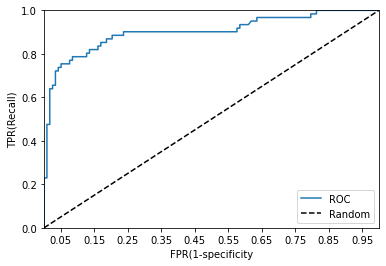

In [24]:
import matplotlib.pyplot as plt
def roc_curve_plot(y_test, pred_porba_c1) :
    fprs,tprs, thresholds = roc_curve(y_test, pred_proba_c1)
    plt.plot(fprs, tprs, label='ROC')
    plt.plot([0,1],[0,1], 'k--', label='Random')
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.xlabel('FPR(1-specificity')
    plt.ylabel('TPR(Recall)')
    plt.legend()
    plt.show()
roc_curve_plot(y_test,lr_clf.predict_proba(X_test)[:,1])


In [25]:
from sklearn.metrics import roc_auc_score
pred_proba = lr_clf.predict_proba(X_test)[:,1]
roc_score = roc_auc_score(y_test, pred_proba)  #roc_curve에서는 pred가 아니라 pred_proba를 넣어줘야 함 
print('ROC AUC 값 : {:.4f}'.format(roc_score))

ROC AUC 값 : 0.9024


In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

def get_clf_eval(y_test, pred, pred_proba):
    confusion = confusion_matrix(y_test, pred) 
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차행렬')
    print(confusion)
    print('정확도 : {:.4f}, 정밀도 : {:.4f}, 재현율 : {:.4f}, f1:{:.4f}, acu:{:.4f}'. format(accuracy, precision, recall, f1, roc_auc))
get_clf_eval(y_test, pred, pred_proba) #pred는 위에서 찾아보셈

오차행렬
[[104  14]
 [ 13  48]]
정확도 : 0.8492, 정밀도 : 0.7742, 재현율 : 0.7869, f1:0.7805, acu:0.9024


### 과제 
### Q. 분류기는 Decision Tree(DT), parameters, cv=5, scoring ='accuracy'를 적용하여 교차검증과 성능 개선을 위한 하이퍼파라미터 튜닝을 수행하여 최적의 모델을 생성한 후 평가하세요. 평가는 분류 평가지표 모두를 포함하는 사용자 함수를 작성하여 수행
[파라미터]
- max_depth :[2,3,5,10]
- min_samples_split : [2,3,5]
- mean_samples_leaf : [1,5,8]

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score

dt_clf = DecisionTreeClassifier()

parameters = {'max_depth' :[2,3,5,10], 
            'min_samples_split' : [2,3,5], 
            'min_samples_leaf' : [1,5,8]}

grid_dclf = GridSearchCV(dt_clf, param_grid=parameters, cv=5, scoring='accuracy', refit=True) #최적의 하이퍼파라미터를 적용해서 다시 돌려줌
grid_dclf.fit(X_train, y_train)

print('최적의 하이퍼 파라미터 : \n', grid_dclf.best_params_)
print('최고 예측 정확도 : {0:.4f}'.format(grid_dclf.best_score_))


최적의 하이퍼 파라미터 : 
 {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
최고 예측 정확도 : 0.7992


In [28]:
import time
from sklearn.ensemble import GradientBoostingClassifier
gb_clf=GradientBoostingClassifier(random_state=0)
params = {
    'n_estimators' : [100,200],
    'learning_rate' : [0.05,0.1]    
}
  ## hyper parameter vs  parameter
     # hyper -> 직접 입력해주는 값이 hyper parameter (n_estimators , learning_rate)
        
     #  parameter --> 직접 안 입력해도되는거 ex: 계수 , 절편
start_time = time.time()
grid_cv = GridSearchCV(gb_clf,param_grid = params,cv=2,verbose=1)
grid_cv.fit(X_train,y_train)
print('최적 하이퍼 파라미터:\n',grid_cv.best_params_)
print('최고 예측 정확도:{:.4f}'.format(grid_cv.best_score_))

print('수행시간 : {0:1f} 초'.format(time.time()-start_time))

Fitting 2 folds for each of 4 candidates, totalling 8 fits
최적 하이퍼 파라미터:
 {'learning_rate': 0.1, 'n_estimators': 100}
최고 예측 정확도:0.8146
수행시간 : 1.295468 초


In [29]:
from sklearn.tree import DecisionTreeClassifier 
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived',axis=1)
X_titanic_df = transform_features(X_titanic_df)

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df,
                                                   test_size=0.2, random_state=11)

dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train,y_train)
pred = dt_clf.predict(X_test)
accuracy_dt = accuracy_score(y_test,pred)
accuracy_dt

0.8100558659217877

In [30]:
#  GridSearchCV : 교차검증과 성능 개선을 위한 하이퍼파라미터 튜닝을 동시에 수행
# 교차 검증을 기반으로 하이퍼 파라미터의 최적 값을 찾게 해줌
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score , \
recall_score ,confusion_matrix, f1_score, roc_auc_score

parameters = {'max_depth':[2,3,5,10], 'min_samples_split':[2,3,5],\
              'min_samples_leaf':[1,5,8]}

grid_dclf = GridSearchCV(dt_clf, param_grid=parameters, scoring='accuracy', \
                         cv=5, refit=True)
grid_dclf.fit(X_train, y_train)
print(grid_dclf)
print('GridSearchCV 최적 하이퍼 파라미터:', grid_dclf.best_params_)
print('GridSeachCV 최고 정확도: {0:.4f}'.format(grid_dclf.best_score_))

best_dclf = grid_dclf.best_estimator_
print(best_dclf)
dpredictions = best_dclf.predict(X_test)
dpred_proba = best_dclf.predict_proba(X_test)[:,1]
accuracy = accuracy_score(y_test, dpredictions)
print('grid_dt 예측 정확도 :', accuracy)

def get_clf_eval(y_test , dpredictions, dpred_proba):
    confusion = confusion_matrix( y_test, dpredictions)
    accuracy = accuracy_score(y_test , dpredictions)
    precision = precision_score(y_test , dpredictions)
    recall = recall_score(y_test , dpredictions)
    f1 = f1_score(y_test,dpredictions)
    roc_auc = roc_auc_score(y_test, dpred_proba)
    print('오차 행렬')
    print(confusion)
    print()    
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
get_clf_eval(y_test , dpredictions, dpred_proba)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 5, 10],
                         'min_samples_leaf': [1, 5, 8],
                         'min_samples_split': [2, 3, 5]},
             scoring='accuracy')
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSeachCV 최고 정확도: 0.7992
DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)
grid_dt 예측 정확도 : 0.8715083798882681
오차 행렬
[[109   9]
 [ 14  47]]

정확도: 0.8715, 정밀도: 0.8393, 재현율: 0.7705,    F1: 0.8034, AUC:0.8937
